In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [4]:
data_1=pd.read_pickle("/content/dbscan2000.pkl")
data_2=pd.read_csv("/content/Clustering_gmm.csv")

# **Defining functions**

In [5]:
# defining function to find all neighbors of a given point within a specified radius
def neighbor_p(data, p, max_dist):
        neighbors = []
        for i in range(len(data)):
            dist = math.sqrt((data[i][0] - p[0])**2 + (data[i][1] - p[1])**2)
            if dist < max_dist:
                neighbors.append(data[i])
        return neighbors

In [6]:
def dbscan(data, eps, minpts):
  neighbors_list = []
  for i in range(len(data)):
      n = neighbor_p(data, data[i], eps)
      neighbors_list.append(n)

  ## classifying and labelling points as core or non-core depending 
  ## on the density (minimum points within epsilon radius from the point)
  core_pts = []
  pt_label = [0]*len(data)

  for i in range(len(neighbors_list)):
      if len(neighbors_list[i]) >= minpts:
          pt_label[i] = 'core'
          core_pts.append(data[i])
      else:
          pt_label[i] = 'noise'
  
  ## classifying non-core points that lie within epsilon radius 
  ## of core points as border points
  border_pts = []
  
  for i in range(len(data)):
      for j in neighbors_list[i]:
          if pt_label[i] == 'noise':
              if pt_label[data.index(j)] == 'core':
                  pt_label[i] = 'border'                   
                  border_pts.append(data[i])
              
  ## forming the clusters
  cluster_label = 0
  for i in range(0,len(data)):
      
      temp = []
      
      ## adding (changing point label from core/border to the cluster number) 
      ## the core and border points in the neighbourhood 
      ## of a core point, say A to a cluster
      if pt_label[i] == 'core':
          cluster_label = cluster_label+1
          pt_label[i] = cluster_label
          
          for j in neighbors_list[i]:
              if pt_label[data.index(j)] == 'core':
                  pt_label[data.index(j)] = cluster_label
                  temp.append(j)
                  
              elif pt_label[data.index(j)] == 'border':
                  pt_label[data.index(j)] = cluster_label
          
          ## adding the density reachable points from A to the cluster
          ## i.e., the core and border points in the neighbourhood of 
          ## the core points in the neighbourhood of A. 
          
          while len(temp) != 0:
              m = temp[len(temp)-1]
              core_neighbors = neighbors_list[data.index(m)]
              
              for k in core_neighbors:
                  if pt_label[data.index(k)] == 'core':
                      pt_label[data.index(k)] = cluster_label
                      temp.append(k)
                  
                  elif pt_label[data.index(k)] == 'border':
                      pt_label[data.index(k)] = cluster_label
                      
              temp.remove(m)
  
  ## since the point label is changed from core/border to cluster number 
  ## when it is added to a cluster, the same point will not be considered 
  ## in the next round of the loop; i.e, once a point is added to a cluster, 
  ## it will not be added to any other cluster

  ## if a cluster has points less than min-pts, it is classified as noise
  for i in range(cluster_label):
      if pt_label.count(cluster_label) < minpts:
          for i in range(len(data)):
              if pt_label[i] == cluster_label:
                  pt_label[i]= 'noise'
              
          cluster_label -= 1
  res=pd.DataFrame({0:['number of clusters','number of points in cluster 1','number of points in cluster 2','number of points in cluster 3','number of points in cluster 4','number of noise points','in the given dataset number of core points' ,'in the given dataset number of border points','in the given dataset number of noise points'],1: [cluster_label,pt_label.count(1),pt_label.count(2),pt_label.count(3),pt_label.count(4),pt_label.count('noise'),len(core_pts),len(border_pts),pt_label.count('noise')]})
  return pt_label,res



In [7]:
def plot(x,pt_label):
  
  plt.figure(figsize=(12,6))
  for i in range(len(x)):
    if pt_label[i] == 1:
        pos = i
        plt.plot(x[i][0],x[i][1],'.', color = 'purple')
        
    elif pt_label[i] == 2:
        pos = i
        plt.plot(x[i][0],x[i][1],'.', color = 'blue')
        
    elif pt_label[i] == 3:
        pos = i
        plt.plot(x[i][0],x[i][1],'.', color = 'green')      
    
    elif pt_label[i] == 4:
        pos = i
        plt.plot(x[i][0],x[i][1],'.', color = 'yellow')

    elif pt_label[i] == 'noise':
        pos = i
        plt.plot(x[i][0],x[i][1],'.', color = 'red')


#**for dataset 1 ( DBSCAN FILE)**




In [8]:
x=[]
for i in range(len(data_1)):
  x.append(data_1[i][0])
y=[]
for i in range(len(data_1)):
  y.append(data_1[i][1])
data = []
for i in range(len(x)):
    data.append([x[i],y[i]])

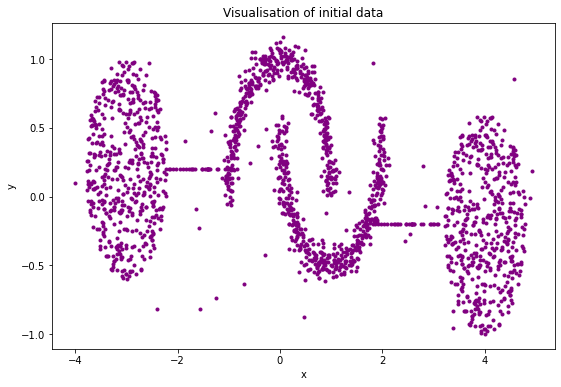

In [9]:
plt.figure(figsize=(9,6))
plt.title("Visualisation of initial data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y,'.',color='purple')

In [10]:
result1=dbscan(data,0.23,25)
result1[1]

,0,1
0,number of clusters,4
1,number of points in cluster 1,509
2,number of points in cluster 2,465
3,number of points in cluster 3,510
4,number of points in cluster 4,462
5,number of noise points,54
6,in the given dataset number of core points,1831
7,in the given dataset number of border points,115
8,in the given dataset number of noise points,54


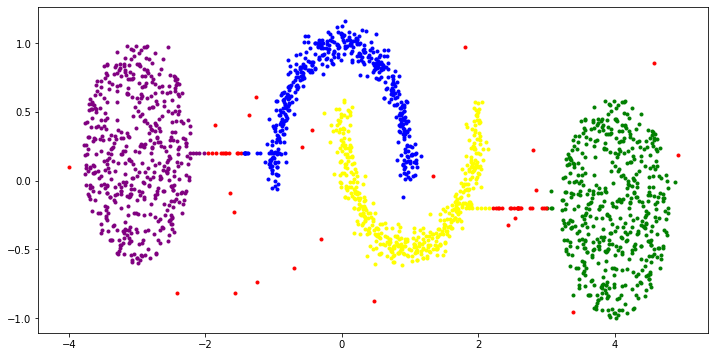

In [11]:
plot(data,result1[0])

In [12]:
result2=dbscan(data,0.21,25)
result2[1]

,0,1
0,number of clusters,4
1,number of points in cluster 1,507
2,number of points in cluster 2,458
3,number of points in cluster 3,509
4,number of points in cluster 4,462
5,number of noise points,64
6,in the given dataset number of core points,1719
7,in the given dataset number of border points,217
8,in the given dataset number of noise points,64


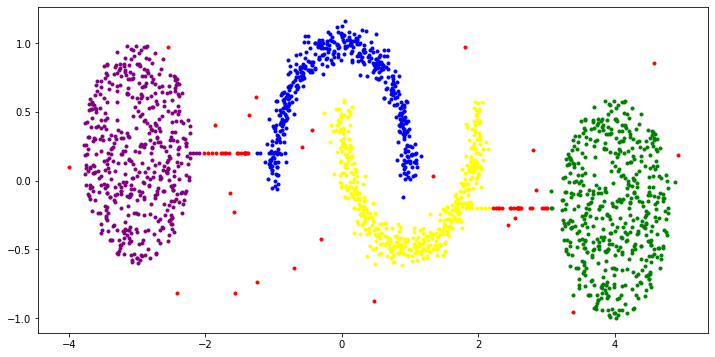

In [13]:
plot(data,result2[0])

#**for dataset 2 ( clustering_gmm FILE)**

In [14]:
data1=[]
x=data_2['Weight'].tolist()
y = data_2['Height'].tolist()
for i in range(len(x)):
    data1.append([x[i],y[i]])


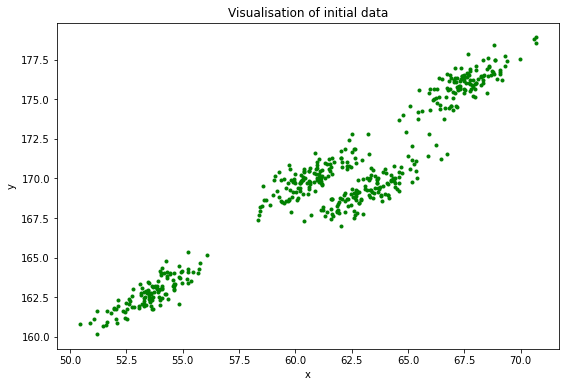

In [15]:
plt.figure(figsize=(9,6))
plt.title("Visualisation of initial data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y,'.',color='green')

In [16]:
result3=dbscan(data1,0.5,10)
result3[1]

,0,1
0,number of clusters,4
1,number of points in cluster 1,85
2,number of points in cluster 2,91
3,number of points in cluster 3,102
4,number of points in cluster 4,100
5,number of noise points,122
6,in the given dataset number of core points,279
7,in the given dataset number of border points,106
8,in the given dataset number of noise points,122


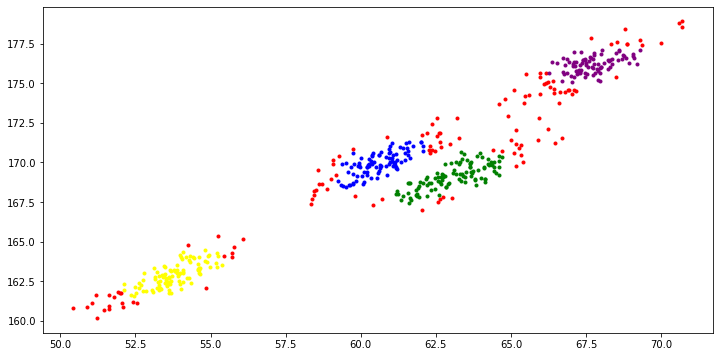

In [17]:
plot(data1,result3[0])